# Lineal plot

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [65]:
def sysang_get_aprox_pose_articul(id_exercise, id_pose, id_articulacion):
   
    #######################################################################
    #Sistema: Sistema de ángulos
    #Función: Obtiene el ángulo del trainer según pose y articulación
    #######################################################################
    #Input:
    #  - id_exercise:     str
    #  - id_pose:         int
    #  - id_articulacion: str (Parte del cuerpo)
    #Output:
    #  - trainer_angle:     float (Ángulo trainer)
    #  - trainer_sd:        float (Desviación Estándar)
    #  - trainer_factor_sd: float (Factor Desviación Estándar)
    #######################################################################

    #df = pd.read_csv("02. trainers/" + id_exercise + "/costs/angulos_" + id_exercise + "_promedio.csv")
    df = pd.read_csv("../02. trainers/" + id_exercise + "/costs/angulos_" + id_exercise + "_promedio.csv")

    filter = (df['pose']==id_pose) & (df['Articulacion']==id_articulacion)
    df_result = df.loc[filter]

    trainer_angle = df_result['Angulo'].iloc[0]
    trainer_sd = df_result['Desviacion_estandar'].iloc[0]
    trainer_factor_sd = df_result['Factor_dev'].iloc[0]

    return trainer_angle, trainer_sd, trainer_factor_sd

#########################
id_exercise = 'push_up'
id_pose = 1
id_articulacion = 'right_elbow_angles' #Sin posfijo

In [66]:
re = pd.read_csv("../02. trainers/" + id_exercise + "/costs/angulos_" + id_exercise + "_promedio.csv")
re

,pose,Angulo,Desviacion_estandar,Factor_dev,Desviacion_estandar_f,Articulacion
0,1,168.862333,3.811828,3,11.435483,right_elbow_angles
1,1,178.151647,0.778411,3,2.335232,right_hip_angles
2,1,177.447102,2.454374,3,7.363122,right_knee_angles
3,2,69.481433,6.707257,3,20.121771,right_elbow_angles
4,2,178.201725,1.653116,3,4.959347,right_hip_angles
5,2,177.151949,0.996902,3,2.990706,right_knee_angles
6,3,164.245490,2.251942,3,6.755827,right_elbow_angles
7,3,174.416549,2.775865,3,8.327596,right_hip_angles
8,3,176.666373,2.068518,3,6.205554,right_knee_angles


In [67]:
#########################
id_exercise = 'push_up'
id_pose = 2
id_articulacion = 'right_elbow_angles' #Sin posfijo

trainer_angle, trainer_sd, trainer_factor_sd = sysang_get_aprox_pose_articul(id_exercise, id_pose, id_articulacion)
print("trainer_angle:{} - trainer_sd:{} - trainer_factor_sd:{}".format(trainer_angle, trainer_sd, trainer_factor_sd))

trainer_angle:69.48143288 - trainer_sd:6.707256952 - trainer_factor_sd:3


In [68]:
df = pd.read_csv('../03. users/20230416_202407_malcant_push_up.csv')
df

,id_exercise,DateTime_Start,DateTime_End,n_poses,n_sets,n_reps,total_poses,seconds_rest_time,Class,Prob,...,left_knee_angles_fl,right_shoulder_angles_bd,right_hip_angles_bd,right_knee_angles_bd,left_knee_angles_bd,right_elbow_angles_bd,left_elbow_angles_bd,pose_trainer_cost_min,pose_trainer_cost_max,pose_user_cost
0,push_up,2023-04-16 20:23:11.599,2023-04-16 20:23:27.400,3,2,1,6,5,push_up,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.54,13.34,58.3625
1,push_up,2023-04-16 20:23:27.400,2023-04-16 20:23:28.774,3,2,1,6,5,push_up,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.90,42.86,63.3434
2,push_up,2023-04-16 20:23:28.774,2023-04-16 20:23:34.721,3,2,1,6,5,push_up,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.43,12.91,60.7396
3,push_up,2023-04-16 20:23:34.721,2023-04-16 20:23:47.494,3,2,1,6,5,push_up,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.54,13.34,55.5647
4,push_up,2023-04-16 20:23:47.494,2023-04-16 20:23:49.144,3,2,1,6,5,push_up,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.90,42.86,60.9593
5,push_up,2023-04-16 20:23:49.144,2023-04-16 20:23:59.050,3,2,1,6,5,push_up,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.43,12.91,46.7887


In [69]:
posfijo = '_pu'
plot_filter = ['id_exercise', 'DateTime_Start', 'DateTime_End', 'count_pose', 'count_pose_g', (id_articulacion+posfijo)]

df2 = df[plot_filter]
df2.rename(columns = {(id_articulacion+posfijo):(id_articulacion+posfijo+'_user')}, inplace = True)

df2

,id_exercise,DateTime_Start,DateTime_End,count_pose,count_pose_g,right_elbow_angles_pu_user
0,push_up,2023-04-16 20:23:11.599,2023-04-16 20:23:27.400,1,1,163
1,push_up,2023-04-16 20:23:27.400,2023-04-16 20:23:28.774,2,2,75
2,push_up,2023-04-16 20:23:28.774,2023-04-16 20:23:34.721,3,3,157
3,push_up,2023-04-16 20:23:34.721,2023-04-16 20:23:47.494,1,4,160
4,push_up,2023-04-16 20:23:47.494,2023-04-16 20:23:49.144,2,5,81
5,push_up,2023-04-16 20:23:49.144,2023-04-16 20:23:59.050,3,6,160


In [70]:
for i, row in df2.iterrows():
    ifor_val = 34
    #print("{} {}".format(i, row))
    id_exercise = row['id_exercise']
    id_pose = row['count_pose']    
    
    #print("{} - {} - {}".format(row['id_exercise'], row['count_pose'], row[(id_articulacion+posfijo+'_user')]))
    trainer_angle, trainer_sd, trainer_factor_sd = sysang_get_aprox_pose_articul(id_exercise, id_pose, id_articulacion)
    
    df2.at[i,(id_articulacion+posfijo+'_trainer')] = trainer_angle
    print(trainer_angle)
    print("------------")
    
df2

168.8623333
------------
69.48143288
------------
164.2454899
------------
168.8623333
------------
69.48143288
------------
164.2454899
------------


,id_exercise,DateTime_Start,DateTime_End,count_pose,count_pose_g,right_elbow_angles_pu_user,right_elbow_angles_pu_trainer
0,push_up,2023-04-16 20:23:11.599,2023-04-16 20:23:27.400,1,1,163,168.862333
1,push_up,2023-04-16 20:23:27.400,2023-04-16 20:23:28.774,2,2,75,69.481433
2,push_up,2023-04-16 20:23:28.774,2023-04-16 20:23:34.721,3,3,157,164.245490
3,push_up,2023-04-16 20:23:34.721,2023-04-16 20:23:47.494,1,4,160,168.862333
4,push_up,2023-04-16 20:23:47.494,2023-04-16 20:23:49.144,2,5,81,69.481433
5,push_up,2023-04-16 20:23:49.144,2023-04-16 20:23:59.050,3,6,160,164.245490


In [71]:
df2['DateTime_Start'] =  pd.to_datetime(df2['DateTime_Start'], format='%Y-%m-%d %H:%M:%S.%f')
df2['DateTime_End'] =  pd.to_datetime(df2['DateTime_End'], format='%Y-%m-%d %H:%M:%S.%f')
df2['short_time_end'] = df2['DateTime_End'].dt.strftime('%H:%M:%S')
df2['pose_merged'] = "Pose " + df2['count_pose'].map(str) + " (" + df2['count_pose_g'].map(str) + ")"
df2['pose_merged_time'] = df2['pose_merged'].map(str) + "\n" + df2['short_time_end'].map(str)
df2

,id_exercise,DateTime_Start,DateTime_End,count_pose,count_pose_g,right_elbow_angles_pu_user,right_elbow_angles_pu_trainer,short_time_end,pose_merged,pose_merged_time
0,push_up,2023-04-16 20:23:11.599,2023-04-16 20:23:27.400,1,1,163,168.862333,20:23:27,Pose 1 (1),Pose 1 (1)\n20:23:27
1,push_up,2023-04-16 20:23:27.400,2023-04-16 20:23:28.774,2,2,75,69.481433,20:23:28,Pose 2 (2),Pose 2 (2)\n20:23:28
2,push_up,2023-04-16 20:23:28.774,2023-04-16 20:23:34.721,3,3,157,164.245490,20:23:34,Pose 3 (3),Pose 3 (3)\n20:23:34
3,push_up,2023-04-16 20:23:34.721,2023-04-16 20:23:47.494,1,4,160,168.862333,20:23:47,Pose 1 (4),Pose 1 (4)\n20:23:47
4,push_up,2023-04-16 20:23:47.494,2023-04-16 20:23:49.144,2,5,81,69.481433,20:23:49,Pose 2 (5),Pose 2 (5)\n20:23:49
5,push_up,2023-04-16 20:23:49.144,2023-04-16 20:23:59.050,3,6,160,164.245490,20:23:59,Pose 3 (6),Pose 3 (6)\n20:23:59


In [76]:
#default_x_ticks = range(len(df2['DateTime_End']))
#default_x_ticks

In [73]:
min_y = min(df2[(id_articulacion+posfijo+'_user')].min(), df2[(id_articulacion+posfijo+'_trainer')].min())
max_y = max(df2[(id_articulacion+posfijo+'_user')].max(), df2[(id_articulacion+posfijo+'_trainer')].max())

print(min_y, max_y)

69.48143288 168.8623333


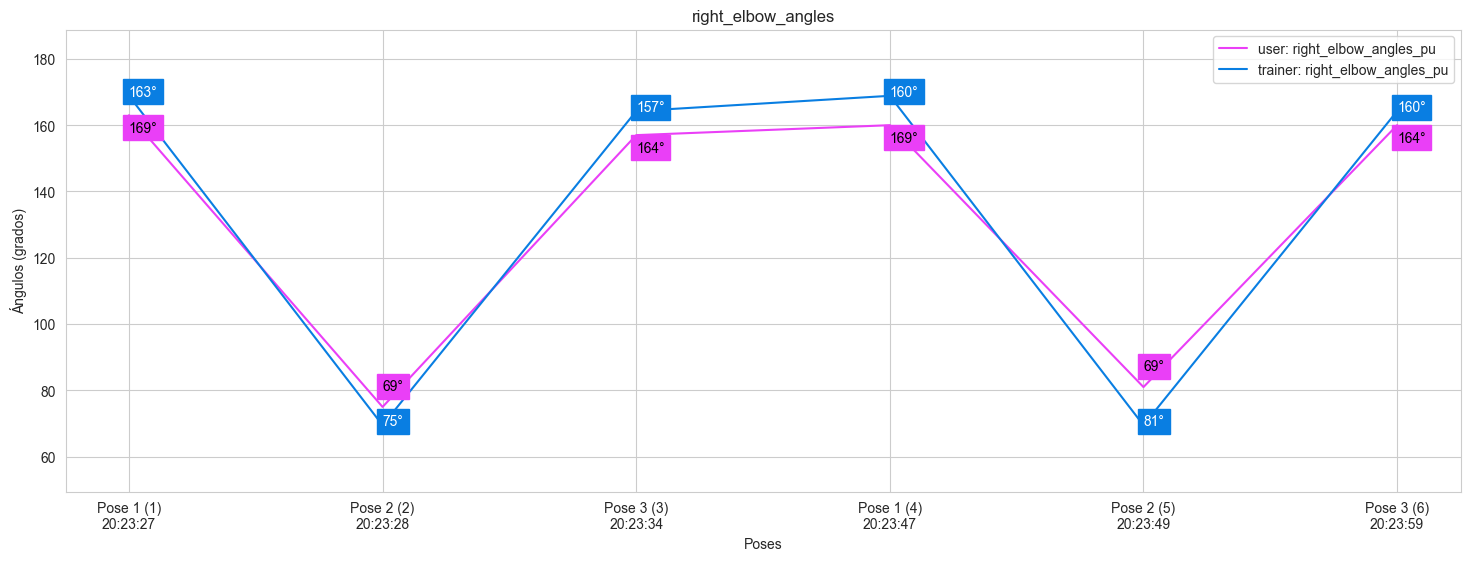

In [75]:
with sns.axes_style("whitegrid"):
    
    fig, ax1 = plt.subplots(figsize=(18,6))

    color_user = '#EA3FF7'
    color_trainer = '#097EE2'

    ax1 = sns.lineplot(x="pose_merged", y=(id_articulacion+posfijo+'_user'), 
                       data=df2, color=color_user,
                       label='user: right_elbow_angles_pu')
    ax1 = sns.lineplot(x="pose_merged", y=(id_articulacion+posfijo+'_trainer'), 
                       data=df2, color=color_trainer,
                       label='trainer: right_elbow_angles_pu')

    for i, row in df2.iterrows():
        angle_trainer = row[(id_articulacion+posfijo + '_user')]
        angle_user = row[(id_articulacion+posfijo + '_trainer')]
        
        ax1.text(
            row['pose_merged'], 
            angle_user,
            "{:.0f}°".format(angle_trainer),
            color = '#FFF', backgroundcolor = color_trainer
        )
        
        y_corrected = -5 if angle_user > angle_trainer else +5
        ax1.text(
            row['pose_merged'], 
            angle_trainer + y_corrected,
            "{:.0f}°".format(angle_user),
            color = '#000000', backgroundcolor = color_user
        )

    ax1.set(title= id_exercise + " - " + id_articulacion)
    ax1.set(xlabel = "Poses", ylabel = "Ángulos (grados)")

    x_labels = df2['pose_merged_time'].values.tolist()
    ax1.set_xticklabels(x_labels)
    ax1.set_ylim([min_y - 20, max_y + 20])
    plt.show()

In [61]:
def get_articulaciones_list(articulaciones_text): #st.session_state.articulaciones
    dictOfStrings = {",": "|", "'": "", " ": ""}

    for text, replacement in dictOfStrings.items():
        #print("{} - {}".format(text, replacement))
        articulaciones_text = articulaciones_text.replace(text, replacement)

    articulaciones_list = articulaciones_text.split('|')

    return articulaciones_list

In [62]:
articulaciones_text = "'right_elbow_angles', 'right_hip_angles', 'right_knee_angles'"

a = get_articulaciones_list(articulaciones_text)
a

['right_elbow_angles', 'right_hip_angles', 'right_knee_angles']

In [57]:
type(a)

list

In [59]:
def get_articulacion_name(id_articulacion):
    dict_articulacion = {
        'right_elbow_angles_pu': 'ángulo codo derecho (Push Up)',
        'right_hit_angles_pu': 'ángulo cadera derecho (Push Up)',
        'right_knee_angles_pu': 'ángulo rodilla derecho (Push Up)',
        'right_shoulder_angles_cu': 'ángulo hombro derecho (Curl Up)',
        'right_hit_angles_cu': 'ángulo cadera derecho(Curl Up)',
        'right_knee_angles_cu': 'ángulo rodilla derecho (Curl Up)',
        'right_shoulder_angles_fp': 'ángulo hombro derecho (Front Plank)',
        'right_hit_angles_fp': 'ángulo cadera derecho (Front Plank)',
        'right_ankle_angles_fp': 'ángulo tobillo derecho (Front Plank)',
        'right_hit_angles_fl': 'ángulo cadera derecho (Forward Lunge)',
        'right_knee_angles_fl': 'ángulo rodilla derecho (Forward Lunge)',
        'left_knee_angles_fl': 'ángulo rodilla izquierda (Forward Lunge)',
        'right_shoulder_angles_bd': 'ángulo hombro derecho (Bird Dog)',
        'right_hit_angles_bd': 'ángulo cadera derecho (Bird Dog)',
        'right_knee_angles_bd': 'ángulo rodilla derecho (Bird Dog)',
        'left_knee_angles_bd': 'ángulo rodilla izquierda (Bird Dog)',
        'right_elbow_angles_bd': 'ángulo codo derecho (Bird Dog)',
        'left_elbow_angles_bd': 'ángulo codo izquierdo (Bird Dog)'
    }
    return dict_articulacion.get(id_articulacion)

In [60]:
id_articulacion = 'right_hit_angles_cu'
f = get_articulacion_name(id_articulacion)
f

'ángulo cadera derecho(Curl Up)'